In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Loading data

In [2]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('cleveland.csv', names = features)
hungarianData = pd.read_csv('hungary.csv', names = features)
switzerlandData = pd.read_csv('switzerland.csv', names = features)

In [3]:
datatemp = [clivelandData, hungarianData, switzerlandData]
data = pd.concat(datatemp)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
data = data.drop(["ca", "slope", "thal"],axis=1)
data = data.replace('?', np.nan)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0


# Missing data detection

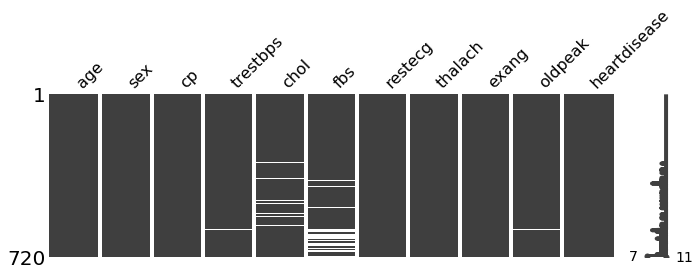

In [6]:
msno.matrix(data,figsize=(10,3))

# Outliners detection and class imbalance

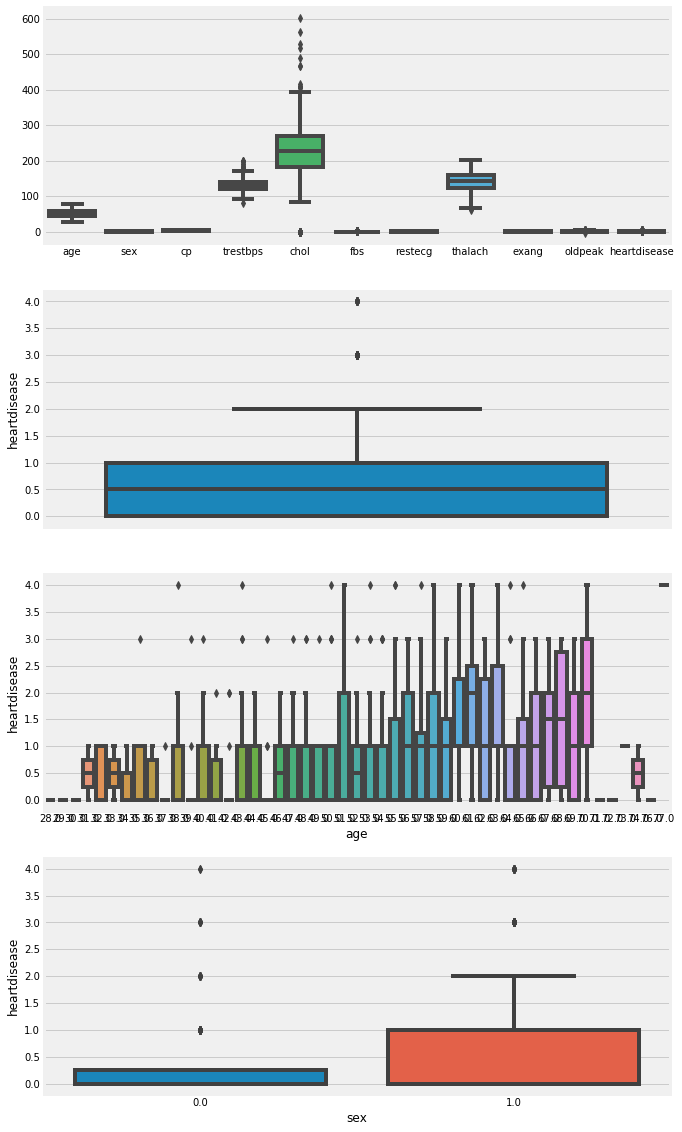

In [7]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,orient="v",ax=axes[0])
sn.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sn.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sn.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])

# Correlation analysis

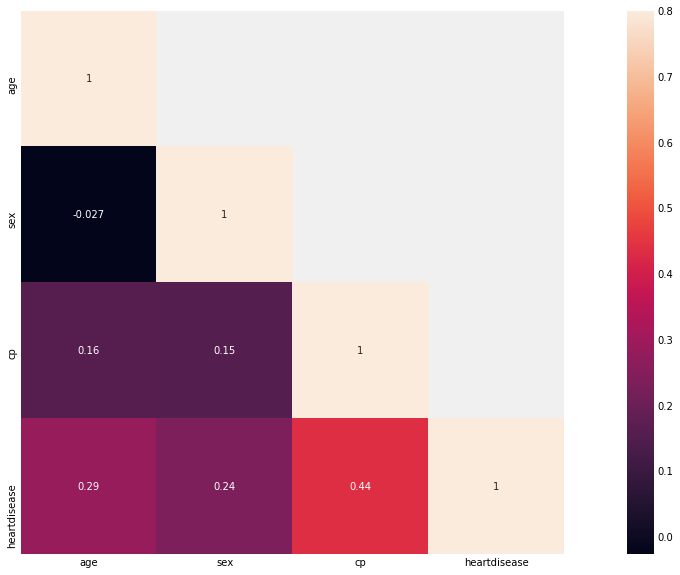

In [8]:
corr_matt = data.corr()
mask = np.array(corr_matt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr_matt, mask=mask,vmax=.8, square=True,annot=True)